In [566]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [567]:
food_orders_df = pd.read_csv(
    "./food_orders_new_delhi.csv",
    index_col="Order ID",
    parse_dates=["Order Date and Time", "Delivery Date and Time"],
)
food_orders_df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
Order ID,,,,,,,,,,,
1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [568]:
food_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer ID             1000 non-null   object        
 1   Restaurant ID           1000 non-null   object        
 2   Order Date and Time     1000 non-null   datetime64[ns]
 3   Delivery Date and Time  1000 non-null   datetime64[ns]
 4   Order Value             1000 non-null   int64         
 5   Delivery Fee            1000 non-null   int64         
 6   Payment Method          1000 non-null   object        
 7   Discounts and Offers    815 non-null    object        
 8   Commission Fee          1000 non-null   int64         
 9   Payment Processing Fee  1000 non-null   int64         
 10  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 93.8+ KB


##### Convert “Discounts and Offers” to a consistent numeric value or calculate the discount amounts.


In [569]:
food_orders_df["Discounts and Offers"].unique()

array(['5% on App', '10%', '15% New User', nan, '50 off Promo'],
      dtype=object)

In [570]:
food_orders_df["Discounts and Offers"] = food_orders_df["Discounts and Offers"].fillna(
    0.0
)

In [571]:
def extract_discount(discount_str):
    # checking type using isinstance() function
    if isinstance(discount_str, str) and "%" in discount_str:
        return ("Percentage", float(discount_str.split("%")[0]))
    # Directly checking type
    elif type(discount_str) is str and "off" in discount_str:
        return ("Flat off", float(discount_str.split(" ")[0]))
    else:
        return ("No discount", discount_str)

In [572]:
food_orders_df["Discount Percentage/Flat Off"] = food_orders_df[
    "Discounts and Offers"
].apply(extract_discount)
food_orders_df

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off
Order ID,,,,,,,,,,,,
1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,"(Percentage, 5.0)"
2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,"(Percentage, 10.0)"
3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,"(Percentage, 15.0)"
4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,"(No discount, 0.0)"
5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,"(Flat off, 50.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...
996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,"(Percentage, 5.0)"
997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0.0,110,42,0,"(No discount, 0.0)"
998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0.0,64,31,0,"(No discount, 0.0)"


In [573]:
def calculate_discount_amount(x):
    if x["Discount Percentage/Flat Off"][0] == "Percentage":
        return (x["Order Value"] * x["Discount Percentage/Flat Off"][1]) / 100
    elif x["Discount Percentage/Flat Off"][0] == "Flat off":
        return x["Discount Percentage/Flat Off"][1]
    else:
        return x["Discount Percentage/Flat Off"][1]

In [574]:
food_orders_df["Discount Amount"] = food_orders_df.apply(
    lambda x: calculate_discount_amount(x), axis=1
)
food_orders_df[
    [
        "Customer ID",
        "Restaurant ID",
        "Order Value",
        "Delivery Fee",
        "Commission Fee",
        "Payment Processing Fee",
        "Refunds/Chargebacks",
        "Discount Percentage/Flat Off",
        "Discount Amount",
    ]
]

,Customer ID,Restaurant ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off,Discount Amount
Order ID,,,,,,,,,
1,C8270,R2924,1914,0,150,47,0,"(Percentage, 5.0)",95.70
2,C1860,R2054,986,40,198,23,0,"(Percentage, 10.0)",98.60
3,C6390,R2870,937,30,195,45,0,"(Percentage, 15.0)",140.55
4,C6191,R2642,1463,50,146,27,0,"(No discount, 0.0)",0.00
5,C6734,R2799,1992,30,130,50,0,"(Flat off, 50.0)",50.00
...,...,...,...,...,...,...,...,...,...
996,C6232,R2129,825,0,165,47,50,"(Percentage, 5.0)",41.25
997,C6797,R2742,1627,50,110,42,0,"(No discount, 0.0)",0.00
998,C5926,R2837,553,20,64,31,0,"(No discount, 0.0)",0.00


### **Cost Analysis**

---


##### For the cost analysis, we’ll consider the following costs associated with each order:

- Delivery Fee: The fee charged for delivering the order.
- Payment Processing Fee: The fee for processing the payment.
- Discount Amount: The discount provided on the order.

##### We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.


In [575]:
food_orders_df["Total Costs"] = (
    food_orders_df["Delivery Fee"]
    + food_orders_df["Payment Processing Fee"]
    + food_orders_df["Discount Amount"]
)
food_orders_df[
    [
        "Customer ID",
        "Restaurant ID",
        "Order Value",
        "Delivery Fee",
        "Commission Fee",
        "Payment Processing Fee",
        "Refunds/Chargebacks",
        "Discount Percentage/Flat Off",
        "Discount Amount",
        "Total Costs",
    ]
]

,Customer ID,Restaurant ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off,Discount Amount,Total Costs
Order ID,,,,,,,,,,
1,C8270,R2924,1914,0,150,47,0,"(Percentage, 5.0)",95.70,142.70
2,C1860,R2054,986,40,198,23,0,"(Percentage, 10.0)",98.60,161.60
3,C6390,R2870,937,30,195,45,0,"(Percentage, 15.0)",140.55,215.55
4,C6191,R2642,1463,50,146,27,0,"(No discount, 0.0)",0.00,77.00
5,C6734,R2799,1992,30,130,50,0,"(Flat off, 50.0)",50.00,130.00
...,...,...,...,...,...,...,...,...,...,...
996,C6232,R2129,825,0,165,47,50,"(Percentage, 5.0)",41.25,88.25
997,C6797,R2742,1627,50,110,42,0,"(No discount, 0.0)",0.00,92.00
998,C5926,R2837,553,20,64,31,0,"(No discount, 0.0)",0.00,51.00


##### The revenue for the platform is mainly derived from the Commission Fee.


In [576]:
food_orders_df["Revenue"] = food_orders_df["Commission Fee"]
food_orders_df[
    [
        "Customer ID",
        "Restaurant ID",
        "Order Value",
        "Delivery Fee",
        "Commission Fee",
        "Payment Processing Fee",
        "Refunds/Chargebacks",
        "Discount Percentage/Flat Off",
        "Discount Amount",
        "Total Costs",
        "Revenue",
    ]
]

,Customer ID,Restaurant ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off,Discount Amount,Total Costs,Revenue
Order ID,,,,,,,,,,,
1,C8270,R2924,1914,0,150,47,0,"(Percentage, 5.0)",95.70,142.70,150
2,C1860,R2054,986,40,198,23,0,"(Percentage, 10.0)",98.60,161.60,198
3,C6390,R2870,937,30,195,45,0,"(Percentage, 15.0)",140.55,215.55,195
4,C6191,R2642,1463,50,146,27,0,"(No discount, 0.0)",0.00,77.00,146
5,C6734,R2799,1992,30,130,50,0,"(Flat off, 50.0)",50.00,130.00,130
...,...,...,...,...,...,...,...,...,...,...,...
996,C6232,R2129,825,0,165,47,50,"(Percentage, 5.0)",41.25,88.25,165
997,C6797,R2742,1627,50,110,42,0,"(No discount, 0.0)",0.00,92.00,110
998,C5926,R2837,553,20,64,31,0,"(No discount, 0.0)",0.00,51.00,64


##### We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.


In [577]:
food_orders_df["Profit"] = food_orders_df["Revenue"] - \
    food_orders_df["Total Costs"]
food_orders_df[
    [
        "Customer ID",
        "Restaurant ID",
        "Order Value",
        "Delivery Fee",
        "Commission Fee",
        "Payment Processing Fee",
        "Refunds/Chargebacks",
        "Discount Percentage/Flat Off",
        "Discount Amount",
        "Total Costs",
        "Revenue",
        "Profit",
    ]
]

,Customer ID,Restaurant ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off,Discount Amount,Total Costs,Revenue,Profit
Order ID,,,,,,,,,,,,
1,C8270,R2924,1914,0,150,47,0,"(Percentage, 5.0)",95.70,142.70,150,7.30
2,C1860,R2054,986,40,198,23,0,"(Percentage, 10.0)",98.60,161.60,198,36.40
3,C6390,R2870,937,30,195,45,0,"(Percentage, 15.0)",140.55,215.55,195,-20.55
4,C6191,R2642,1463,50,146,27,0,"(No discount, 0.0)",0.00,77.00,146,69.00
5,C6734,R2799,1992,30,130,50,0,"(Flat off, 50.0)",50.00,130.00,130,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
996,C6232,R2129,825,0,165,47,50,"(Percentage, 5.0)",41.25,88.25,165,76.75
997,C6797,R2742,1627,50,110,42,0,"(No discount, 0.0)",0.00,92.00,110,18.00
998,C5926,R2837,553,20,64,31,0,"(No discount, 0.0)",0.00,51.00,64,13.00


##### Overall metrics for the food delivery operations


In [578]:
# aggregate data to get overall metrics
total_orders = food_orders_df.shape
total_costs = food_orders_df["Total Costs"].sum()
total_revenue = food_orders_df["Revenue"].sum()
total_profit = food_orders_df["Profit"].sum()

print(
    {
        "Total Orders": total_orders[0],
        "Total Costs": total_costs,
        "Total Revenue": total_revenue,
        "Total Profit": total_profit,
    }
)

{'Total Orders': 1000, 'Total Costs': 132741.84999999998, 'Total Revenue': 126990, 'Total Profit': -5751.85}


##### The analysis indicates that the **_total costs_** associated with the food delivery operations exceed the **_total revenue_** generated from commission fees, resulting in a **_net loss_**. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.


#### To better understand the distribution of costs, revenue, and profit, let’s plot:


##### 1) A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.


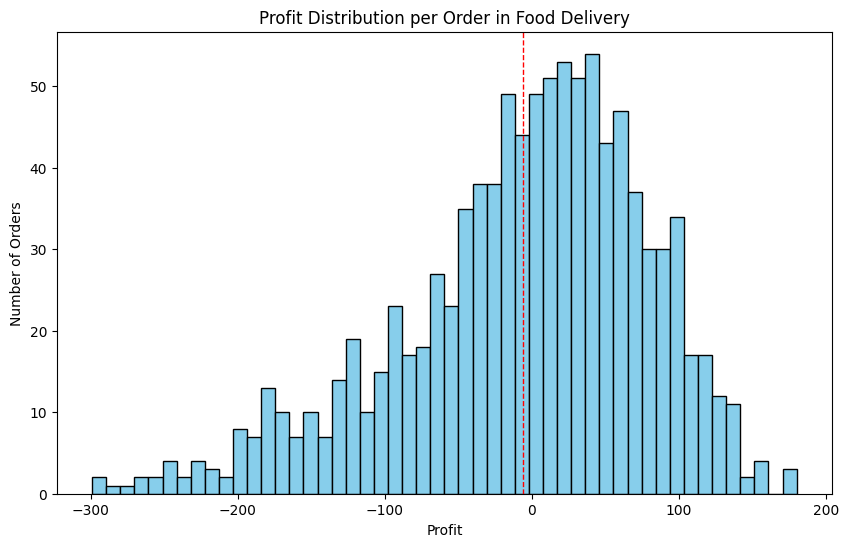

In [579]:
plt.figure(figsize=(10, 6))
plt.hist(food_orders_df["Profit"], bins=50, color="skyblue", edgecolor="black")
plt.title("Profit Distribution per Order in Food Delivery")
plt.xlabel("Profit")
plt.ylabel("Number of Orders")
plt.axvline(
    food_orders_df["Profit"].mean(), color="red", linestyle="dashed", linewidth=1
)
plt.show()

##### The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.


##### 2) A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).


In [580]:
costs_breakdown = food_orders_df[
    ["Delivery Fee", "Payment Processing Fee", "Discount Amount"]
].sum()
costs_breakdown

Delivery Fee              28620.00
Payment Processing Fee    29832.00
Discount Amount           74289.85
dtype: float64

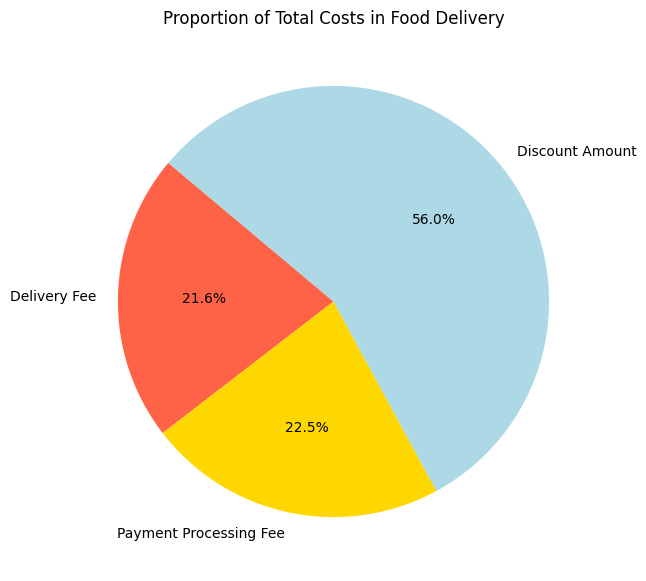

In [581]:
# pie chart for the proportion of total costs
plt.figure(figsize=(7, 7))
plt.pie(
    costs_breakdown,
    labels=costs_breakdown.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["tomato", "gold", "lightblue"],
)
plt.title("Proportion of Total Costs in Food Delivery")
plt.show()

##### The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.


##### 3) A bar chart to compare total revenue, total costs, and total profit


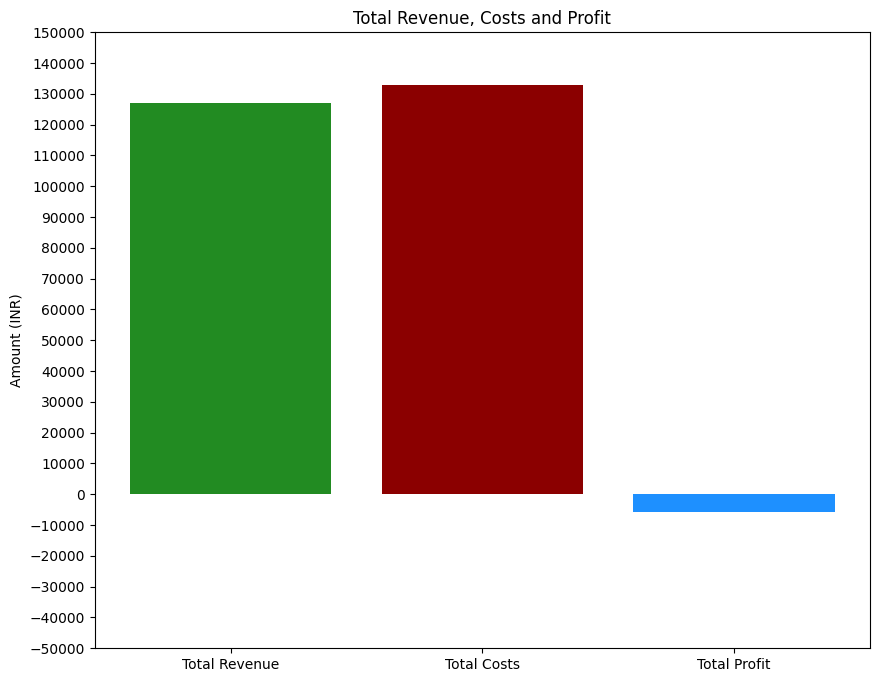

In [582]:
# bar chart for total revenue, costs, and profit
totals = ["Total Revenue", "Total Costs", "Total Profit"]
values = [total_revenue, total_costs, total_profit]
plt.figure(figsize=(10, 8))
plt.bar(
    totals,
    values,
    color=["ForestGreen", "DarkRed", "DodgerBlue"],
)
plt.title("Total Revenue, Costs and Profit")
plt.yticks(ticks=range(-50000, 160000, 10000))
plt.ylabel("Amount (INR)")
plt.show()

##### The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.


### A New Strategy for Profits

---


##### Now, we need to find a new strategy for profitability.

##### Let's seek a new average commission percentage and discount level from profitable orders to guide our pricing strategy.


In [583]:
profitable_orders = food_orders_df.copy().query("Profit > 0.00")
profitable_orders[
    [
        "Customer ID",
        "Restaurant ID",
        "Order Value",
        "Delivery Fee",
        "Commission Fee",
        "Payment Processing Fee",
        "Refunds/Chargebacks",
        "Discount Percentage/Flat Off",
        "Discount Amount",
        "Total Costs",
        "Revenue",
        "Profit",
    ]
]

,Customer ID,Restaurant ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off,Discount Amount,Total Costs,Revenue,Profit
Order ID,,,,,,,,,,,,
1,C8270,R2924,1914,0,150,47,0,"(Percentage, 5.0)",95.70,142.70,150,7.30
2,C1860,R2054,986,40,198,23,0,"(Percentage, 10.0)",98.60,161.60,198,36.40
4,C6191,R2642,1463,50,146,27,0,"(No discount, 0.0)",0.00,77.00,146,69.00
6,C7265,R2777,439,20,92,27,150,"(Percentage, 10.0)",43.90,90.90,92,1.10
7,C1466,R2457,303,30,144,12,50,"(Percentage, 5.0)",15.15,57.15,144,86.85
...,...,...,...,...,...,...,...,...,...,...,...,...
990,C8186,R2622,1058,50,182,45,0,"(Percentage, 5.0)",52.90,147.90,182,34.10
993,C6490,R2230,908,30,138,45,0,"(Flat off, 50.0)",50.00,125.00,138,13.00
996,C6232,R2129,825,0,165,47,50,"(Percentage, 5.0)",41.25,88.25,165,76.75


In [584]:
# calculate the average commission percentage for profitable orders
profitable_orders["Commission Percentage"] = (
    profitable_orders["Commission Fee"] / profitable_orders["Order Value"]
) * 100

# calculate the average discount percentage for profitable orders
profitable_orders["Effective Discount Percentage"] = (
    profitable_orders["Discount Amount"] / profitable_orders["Order Value"]
) * 100
profitable_orders[
    [
        "Restaurant ID",
        "Order Value",
        "Commission Fee",
        "Delivery Fee",
        "Payment Processing Fee",
        "Discount Amount",
        "Total Costs",
        "Revenue",
        "Profit",
        "Commission Percentage",
        "Effective Discount Percentage",
    ]
]

,Restaurant ID,Order Value,Commission Fee,Delivery Fee,Payment Processing Fee,Discount Amount,Total Costs,Revenue,Profit,Commission Percentage,Effective Discount Percentage
Order ID,,,,,,,,,,,
1,R2924,1914,150,0,47,95.70,142.70,150,7.30,7.836991,5.000000
2,R2054,986,198,40,23,98.60,161.60,198,36.40,20.081136,10.000000
4,R2642,1463,146,50,27,0.00,77.00,146,69.00,9.979494,0.000000
6,R2777,439,92,20,27,43.90,90.90,92,1.10,20.956720,10.000000
7,R2457,303,144,30,12,15.15,57.15,144,86.85,47.524752,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
990,R2622,1058,182,50,45,52.90,147.90,182,34.10,17.202268,5.000000
993,R2230,908,138,30,45,50.00,125.00,138,13.00,15.198238,5.506608
996,R2129,825,165,0,47,41.25,88.25,165,76.75,20.000000,5.000000


In [585]:
# calculate the new averages
new_avg_commission_percentage = profitable_orders["Commission Percentage"].mean()
new_avg_discount_percentage = profitable_orders["Effective Discount Percentage"].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

27.706528082159736 5.623712042253798


##### Based on this analysis, a strategy that aims for a commission rate closer to 28% and a discount rate around 6% could potentially improve profitability across the board.


In [586]:
# Simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 28.0  # 28%
recommended_discount_percentage = 6.0  # 6%

In [587]:
profitable_orders.columns

Index(['Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks',
       'Discount Percentage/Flat Off', 'Discount Amount', 'Total Costs',
       'Revenue', 'Profit', 'Commission Percentage',
       'Effective Discount Percentage'],
      dtype='object')

In [588]:
# calculate the simulated commission fee and discount amount using recommended percentages
food_orders_df["Simulated Commission Fee"] = food_orders_df["Order Value"] * (
    recommended_commission_percentage / 100
)
food_orders_df["Simulated Discount Amount"] = food_orders_df["Order Value"] * (
    recommended_discount_percentage / 100
)

# recalculate total costs and profit with simulated values
food_orders_df["Simulated Total Costs"] = (
    food_orders_df["Delivery Fee"]
    + food_orders_df["Payment Processing Fee"]
    + food_orders_df["Simulated Discount Amount"]
)
food_orders_df["Simulated Profit"] = (
    food_orders_df["Simulated Commission Fee"] - food_orders_df["Simulated Total Costs"]
)
food_orders_df[
    [
        "Customer ID",
        "Restaurant ID",
        "Order Value",
        "Delivery Fee",
        "Payment Processing Fee",
        "Simulated Commission Fee",
        "Simulated Discount Amount",
        "Simulated Total Costs",
        "Simulated Profit",
    ]
]

,Customer ID,Restaurant ID,Order Value,Delivery Fee,Payment Processing Fee,Simulated Commission Fee,Simulated Discount Amount,Simulated Total Costs,Simulated Profit
Order ID,,,,,,,,,
1,C8270,R2924,1914,0,47,535.92,114.84,161.84,374.08
2,C1860,R2054,986,40,23,276.08,59.16,122.16,153.92
3,C6390,R2870,937,30,45,262.36,56.22,131.22,131.14
4,C6191,R2642,1463,50,27,409.64,87.78,164.78,244.86
5,C6734,R2799,1992,30,50,557.76,119.52,199.52,358.24
...,...,...,...,...,...,...,...,...,...
996,C6232,R2129,825,0,47,231.00,49.50,96.50,134.50
997,C6797,R2742,1627,50,42,455.56,97.62,189.62,265.94
998,C5926,R2837,553,20,31,154.84,33.18,84.18,70.66


### Visualizing the comparison


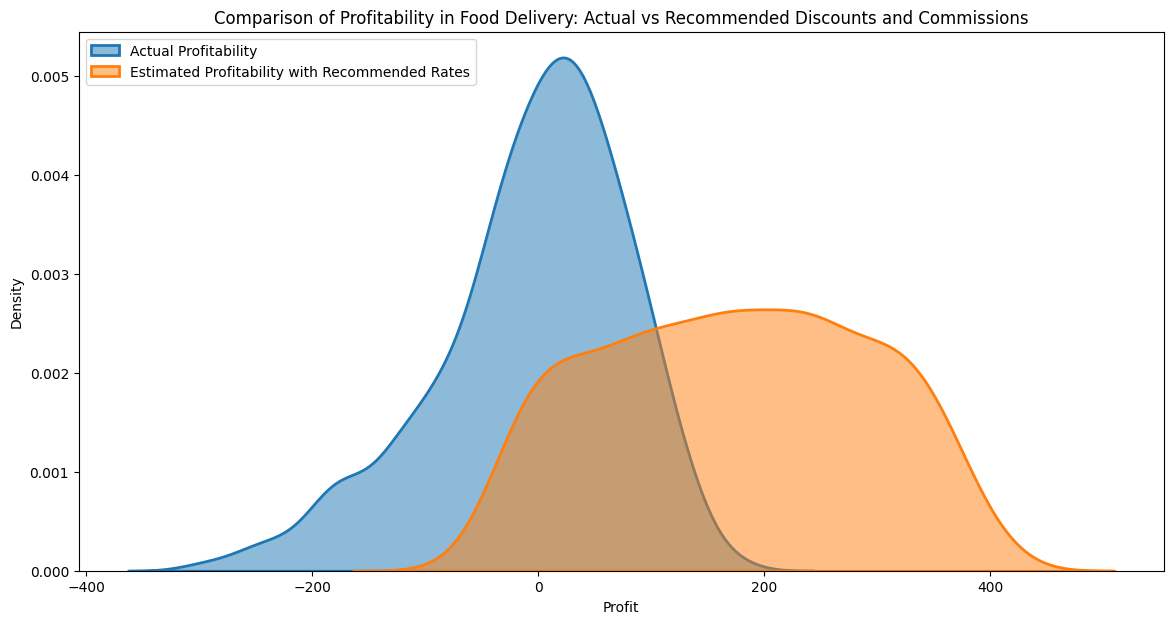

In [589]:
plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(
    food_orders_df["Profit"],
    label="Actual Profitability",
    fill=True,
    alpha=0.5,
    linewidth=2,
)

# simulated profitability
sns.kdeplot(
    food_orders_df["Simulated Profit"],
    label="Estimated Profitability with Recommended Rates",
    fill=True,
    alpha=0.5,
    linewidth=2,
)

plt.title(
    "Comparison of Profitability in Food Delivery: Actual vs Recommended Discounts and Commissions"
)
plt.xlabel("Profit")
plt.ylabel("Density")
plt.legend(loc="upper left")
plt.show()

##### The visualization contrasts the profitability distribution per order under two conditions: one using actual discounts and commissions, and the other simulating recommended discounts set at 6% and commissions at 28%.


##### The actual distribution demonstrates a varied mix, with a notable portion of orders yielding losses (profit < 0) and a broad spread of profit levels for orders. Simulated adjustments indicate a potential shift towards increased profitability per order. The distribution becomes more positively skewed, suggesting that implementing the recommended changes could result in a greater proportion of profitable orders.


In [590]:
simulated_totals = food_orders_df[
    ["Simulated Commission Fee", "Simulated Total Costs", "Simulated Profit"]
].sum()
simulated_totals.index = [
    "Simulated Total Revenue",
    "Simulated Total Costs",
    "Simulated Total Profit",
]
simulated_totals

Simulated Total Revenue    295111.32
Simulated Total Costs      121690.14
Simulated Total Profit     173421.18
dtype: float64

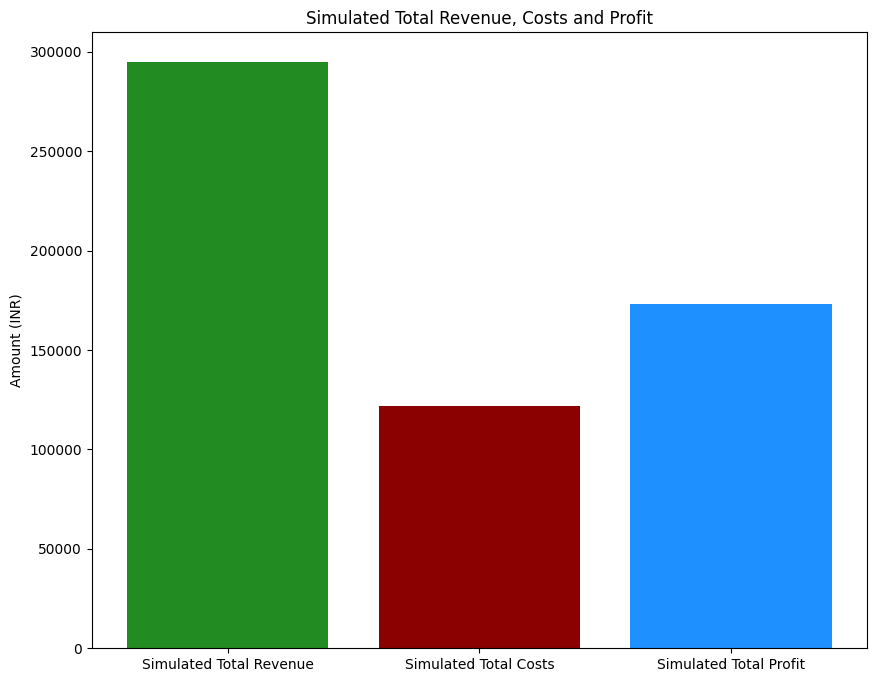

In [591]:
plt.figure(figsize=(10, 8))
plt.bar(
    simulated_totals.index,
    simulated_totals.values,
    color=["ForestGreen", "DarkRed", "DodgerBlue"],
)
plt.title("Simulated Total Revenue, Costs and Profit")
plt.ylabel("Amount (INR)")
plt.show()

##### The bar chart clearly shows simulated total revenue, costs, and profit. It's evident that revenue is higher than costs, leading to a positive profit.